In [ ]:
from google.colab import files
files.upload()


In [ ]:
import os
os.listdir()


['.config', 'imageclass (1).jpg', 'imageclass.jpg', 'sample_data']

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

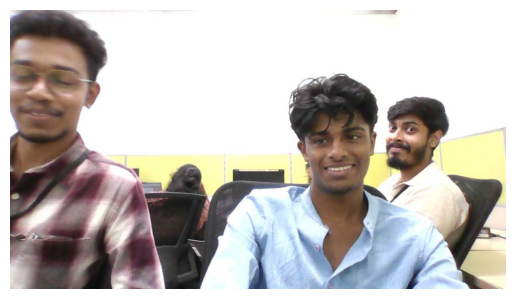

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/imageclass.jpg")  # <-- use exact name

if img is None:
    raise ValueError("Image not loaded. Check file name or path.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

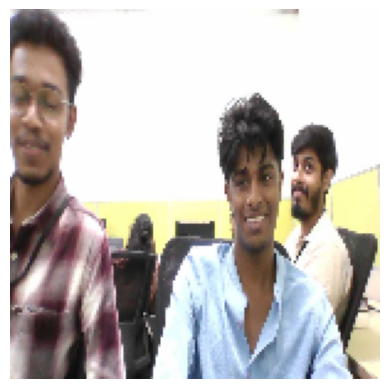

In [ ]:
img_small = cv2.resize(img, (150, 150))
plt.imshow(img_small)
plt.axis("off")

In [ ]:
import numpy as np


In [ ]:
h, w, c = img_small.shape
X = img_small.reshape(-1, 3)   # (pixels, RGB)
X = X.astype(np.float32)
print(X.shape)


(22500, 3)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels_km = kmeans.fit_predict(X)


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

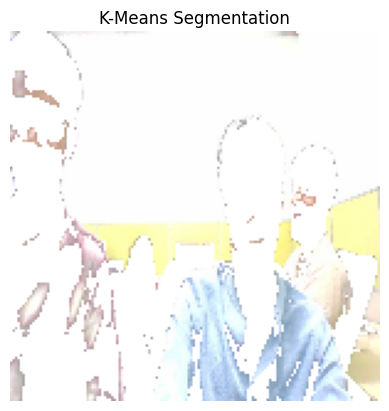

In [ ]:
seg_km = X.copy()
seg_km[labels_km == 1] = [255, 255, 255]

seg_km = seg_km.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_km)
plt.title("K-Means Segmentation")
plt.axis("off")


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

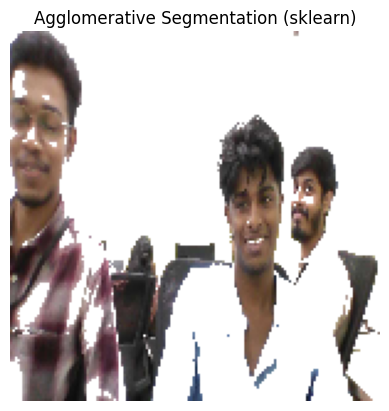

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X)

seg_agg = X.copy()
seg_agg[labels_agg == 1] = [255, 255, 255]

seg_agg = seg_agg.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_agg)
plt.title("Agglomerative Segmentation (sklearn)")
plt.axis("off")


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

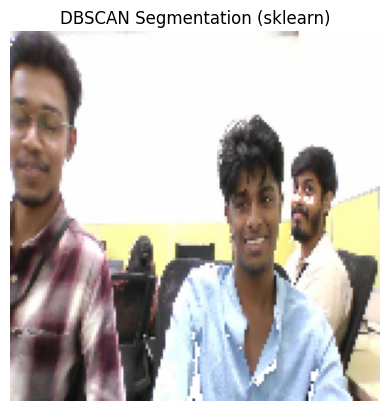

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=15, min_samples=50)
labels_db = dbscan.fit_predict(X)

seg_db = X.copy()
seg_db[labels_db != 0] = [255, 255, 255]

seg_db = seg_db.reshape(h, w, 3).astype(np.uint8)

plt.imshow(seg_db)
plt.title("DBSCAN Segmentation (sklearn)")
plt.axis("off")


(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

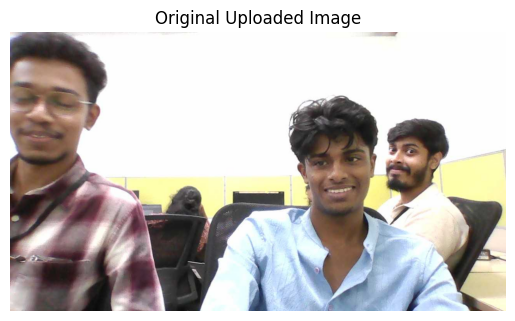

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/imageclass.jpg")   # <-- change name if needed
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# resize for speed
img_small = cv2.resize(img, (20, 20))  # 400 pixels only


plt.imshow(img)
plt.title("Original Uploaded Image")
plt.axis("off")


In [ ]:
h, w, _ = img_small.shape
X = img_small.reshape(-1, 3).astype(np.float32)



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/imageclass.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape
X = img.reshape(-1, 3).astype(float)  # pixels as data points

In [ ]:
class MyKMeans:
    def __init__(self, k=3, max_iters=50):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        np.random.seed(42)
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([
                X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else self.centroids[i]
                for i in range(self.k)
            ])

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def predict(self, X):
        return self.labels_


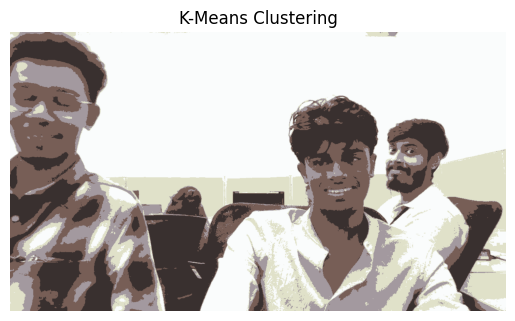

In [ ]:
kmeans = MyKMeans(k=5)
kmeans.fit(X)

segmented = kmeans.centroids[kmeans.labels_].reshape(h, w, 3).astype(np.uint8)

plt.imshow(segmented)
plt.title("K-Means Clustering")
plt.axis("off")
plt.show()
